In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


In [26]:
##Using Kaggle Dataset from https://www.kaggle.com/harlfoxem/housesalesprediction

In [27]:
df=pd.read_csv('../DATA/kc_house_data.csv')#readcsv

In [28]:
df.sort_values('price',ascending=False).head(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
7245  6762700020  10/13/2014  7700000.0         6       8.00        12050   
3910  9808700762   6/11/2014  7060000.0         5       4.50        10040   
9245  9208900037   9/19/2014  6890000.0         6       7.75         9890   
4407  2470100110    8/4/2014  5570000.0         5       5.75         9200   
1446  8907500070   4/13/2015  5350000.0         5       5.00         8000   
1313  7558700030   4/13/2015  5300000.0         6       6.00         7390   
1162  1247600105  10/20/2014  5110000.0         5       5.25         8010   
8085  1924059029   6/17/2014  4670000.0         5       6.75         9640   
2624  7738500731   8/15/2014  4500000.0         5       5.50         6640   
8629  3835500195   6/18/2014  4490000.0         4       3.00         6430   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245     27600     2.5           0     3  ...     13        8570   
3910     37325     2.0           1     2  ...     11        7680   
9245     31374     2.0           0     4  ...     13        8860   
4407     35069     2.0           0     0  ...     13        6200   
1446     23985     2.0           0     4  ...     12        6720   
1313     24829     2.0           1     4  ...     12        5000   
1162     45517     2.0           1     4  ...     12        5990   
8085     13068     1.0           1     4  ...     12        4820   
2624     40014     2.0           1     4  ...     12        6350   
8629     27517     2.0           0     0  ...     12        6430   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7245           3480      1910          1987    98102  47.6298 -122.323   
3910           2360      1940          2001    98004  47.6500 -122.214   
9245           1030      2001             0    98039  47.6305 -122.240   
4407           3000      2001             0    98039  47.6289 -122.233   
1446           1280      2009             0    98004  47.6232 -122.220   
1313           2390      1991             0    98040  47.5631 -122.210   
1162           2020      1999             0    98033  47.6767 -122.211   
8085           4820      1983          2009    98040  47.5570 -122.210   
2624            290      2004             0    98155  47.7493 -122.280   
8629              0      2001             0    98004  47.6208 -122.219   

      sqft_living15  sqft_lot15  
7245           3940        8800  
3910           3930       25449  
9245           4540       42730  
4407           3560       24345  
1446           4600       21750  
1313           4320       24619  
1162           3430       26788  
8085           3270       10454  
2624           3030       23408  
8629           3720       14592  

[10 rows x 21 columns]

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


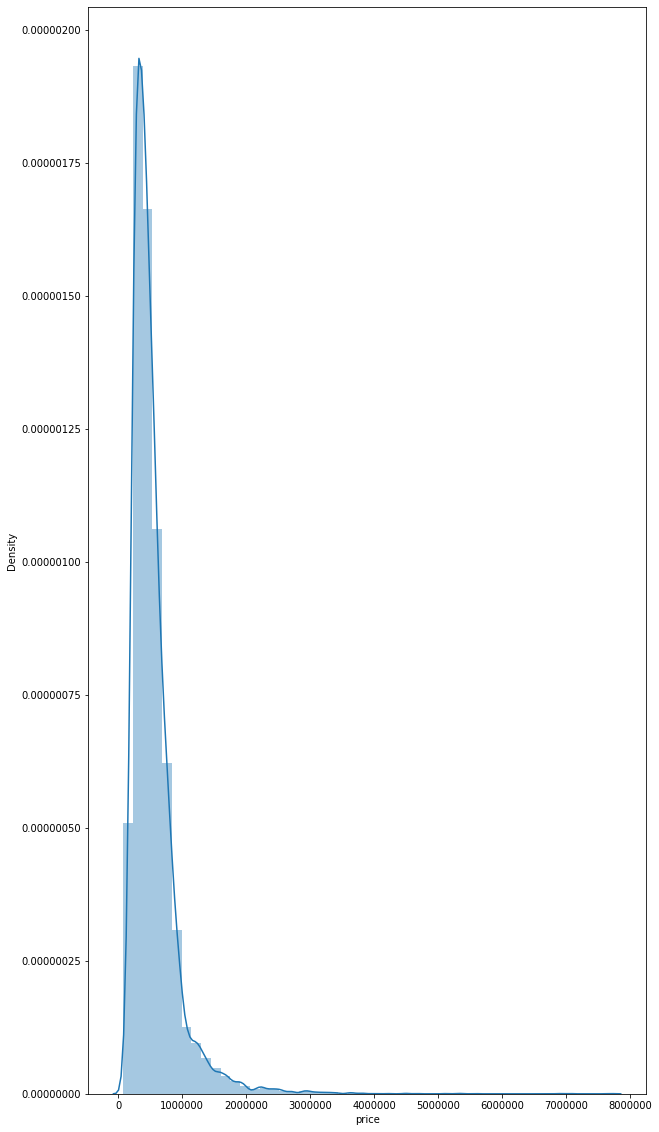

In [29]:
plt.figure(figsize=(10,20))
sns.distplot(df['price'])


In [30]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

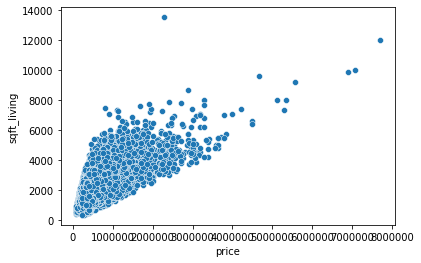

In [31]:
sns.scatterplot(x='price',y='sqft_living',data=df)
#Prettygoodcorrelationhuh?

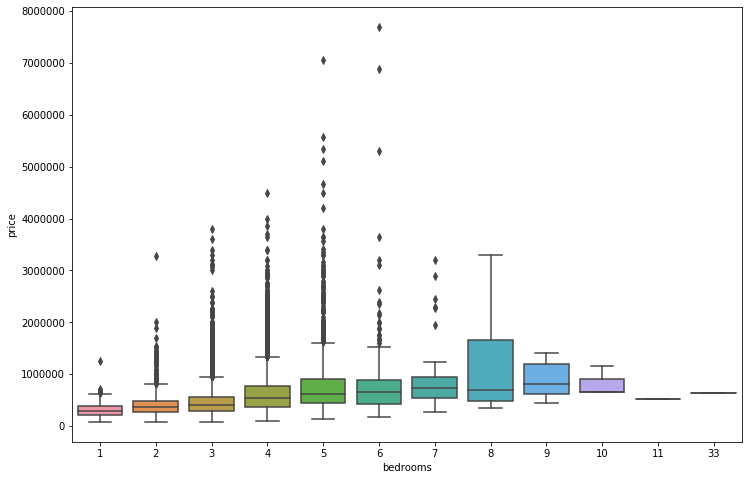

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

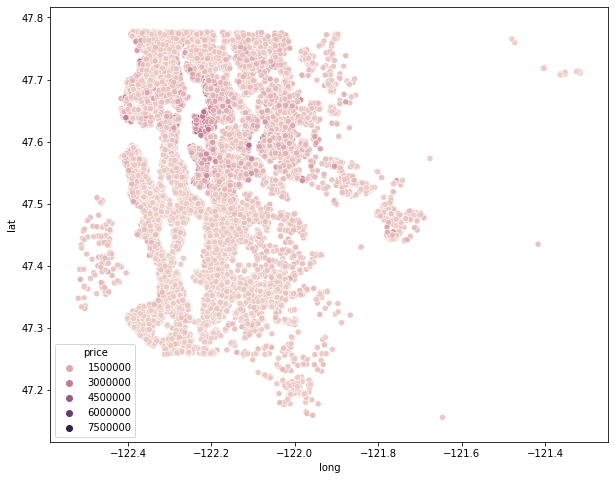

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [34]:
len(df)*0.01 #~top1%todropforbetteraccuracy

215.97

In [41]:
top1percnt=df.sort_values('price',ascending=False).iloc[216:] #runonlyoncelol 




pandas.core.frame.DataFrame

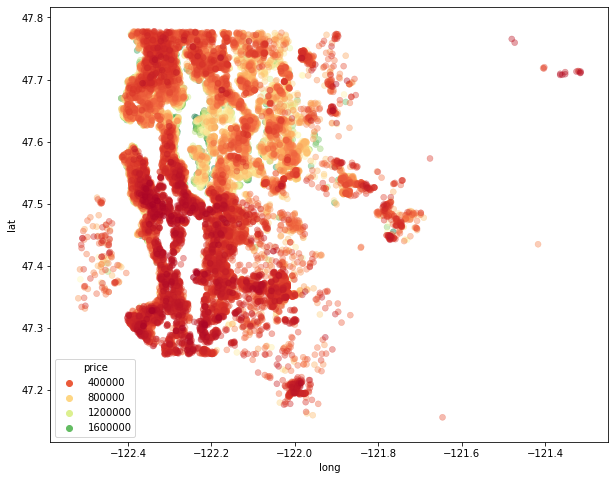

In [42]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=top1percnt,hue='price',palette='RdYlGn',edgecolor=None,alpha=0.4)

In [43]:
top1percnt=top1percnt.drop('id',axis=1)

In [44]:
top1percnt['date']=pd.to_datetime(top1percnt['date'])

In [45]:
top1percnt['year']=top1percnt['date'].apply(lambda date: date.year)
top1percnt['month']=top1percnt['date'].apply(lambda date:date.month)

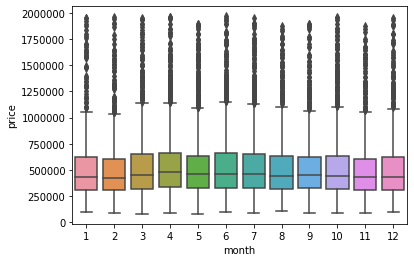

In [46]:
sns.boxplot(x='month',y='price',data=top1percnt)

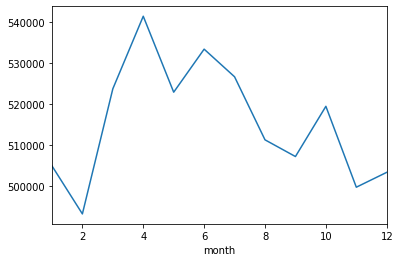

In [47]:
top1percnt.groupby('month').mean()['price'].plot()

In [48]:
top1percnt=top1percnt.drop('date',axis=1)

In [59]:
#df
top1percnt.corr()['sqft_basement'].sort_values() #Correlationagainhmm

floors          -0.264745
long            -0.147881
yr_built        -0.137386
sqft_above      -0.102624
year            -0.015730
month            0.005879
sqft_lot         0.011788
sqft_lot15       0.013683
waterfront       0.034887
yr_renovated     0.061618
zipcode          0.081526
lat              0.107369
grade            0.131352
sqft_living15    0.171946
condition        0.175842
view             0.250284
bathrooms        0.255086
price            0.284659
bedrooms         0.295094
sqft_living      0.405609
sqft_basement    1.000000
Name: sqft_basement, dtype: float64

In [68]:
X=top1percnt.drop('price',axis=1).values
y=top1percnt['price'].values


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [74]:
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [75]:
from tensorflow.keras.models import Sequential

In [76]:
from tensorflow.keras.layers import Dense



In [77]:
X_train.shape


(14966, 20)

In [78]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [79]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Instructions for updating:
Use tf.cast instead.
Train on 14966 samples, validate on 6415 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
14966/14966 [==============================] - 2s 148us/sample - loss: 346857483127.0197 - val_loss: 356759424294.1905
Epoch 2/400
14966/14966 [==============================] - 0s 21us/sample - loss: 344818865980.8612 - val_loss: 349776107978.1263
Epoch 3/400
14966/14966 [==============================] - 0s 23us/sample - loss: 319146617563.5654 - val_loss: 291607568883.3098
Epoch 4/400
14966/14966 [==============================] - 0s 22us/sample - loss: 211669487462.1879 - val_loss: 134607481256.2856
Epoch 5/400
14966/14966 [==============================] - 0s 21us/sample - loss: 79495999313.3877 - val_loss: 58345374702.6008
Epoch 6/400
14966/14966 [==============================] - 0s 20us/sample - loss: 55694635788.5554 - val_loss: 56191334927.0846
Epoch 7/400
14966/14966 [==============================] - 0s 20us/sample - lo

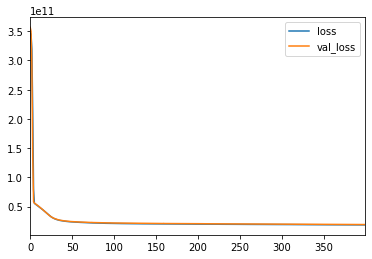

In [80]:
losses= pd.DataFrame(model.history.history)
losses.plot()


In [87]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [88]:
prediction = model.predict(X_test)

In [89]:
mean_absolute_error(y_test,prediction)

93135.73187840998

In [90]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [91]:
explained_variance_score(y_test,prediction)

0.7648015727670114

In [94]:
## Well, that's bad. The accuracy is off by 24% :/ ##